In [55]:
#pip install openpyxl

In [122]:
import pandas as pd
import glob
import os

folder_path = "Dataset"
excel_files = glob.glob(os.path.join(folder_path, "*-laporan_iklim_harian.xlsx"))

# Urutkan berdasarkan nomor file (1-34)
excel_files = sorted(
    excel_files,
    key=lambda x: int(os.path.basename(x).split('-')[0])
)

print(f"📂 Total file ditemukan: {len(excel_files)}")

all_data = []
error_files = []

for file in excel_files:
    file_name = os.path.basename(file)
    print(f"\n🔹 Sedang memproses: {file_name}")

    try:
        # Baca semua isi Excel tanpa header
        raw = pd.read_excel(file, header=None, dtype=str, engine="openpyxl")

        # Cari baris yang mengandung kata 'Tanggal' (dengan toleransi spasi atau karakter tak terlihat)
        header_row = None
        for i, row in raw.iterrows():
            if any("tanggal" in str(cell).replace("\xa0", " ").strip().lower() for cell in row):
                header_row = i
                break

        if header_row is None:
            print(f"⚠️ Tidak ditemukan baris header 'Tanggal' di {file_name}")
            error_files.append(file_name)
            continue

        # Baca ulang mulai dari baris header
        df = pd.read_excel(file, skiprows=header_row, engine="openpyxl")
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
        df = df.dropna(axis=1, how='all')  # hapus kolom kosong
        df = df.dropna(how='all')  # hapus baris kosong

        # Hapus bagian bawah yang mengandung 'KETERANGAN' dan baris setelahnya
        mask = df.astype(str).apply(lambda x: x.str.contains("KETERANGAN", case=False, na=False))
        if mask.any().any():
            stop_index = mask.any(axis=1).idxmax()
            df = df.loc[:stop_index - 1]

        # Hapus baris yang berisi '8888' atau '9999' dalam keterangan bawah
        df = df[~df.astype(str).apply(lambda x: x.str.contains("8888|9999", na=False)).any(axis=1)]

        df = df.reset_index(drop=True)
        all_data.append(df)

    except Exception as e:
        print(f"❌ Error membaca {file_name}: {e}")
        error_files.append(file_name)
        continue

# Gabungkan semua data
if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    expected_cols = ["TANGGAL", "TN", "TX", "TAVG", "RH_AVG", "RR",
                     "SS", "FF_X", "DDD_X", "FF_AVG", "DDD_CAR"]

    # Cek dan ubah nama kolom jika cocok jumlahnya
    if len(final_df.columns) == len(expected_cols):
        final_df.columns = expected_cols
    else:
        print(f"⚠️ Jumlah kolom berbeda ({len(final_df.columns)}). Kolom saat ini:")
        print(final_df.columns.tolist())

    # Simpan hasil akhir
    output_path = os.path.join(folder_path, "gabungan_laporan_iklim_final.xlsx")
    final_df.to_excel(output_path, index=False)
    print(f"\n✅ Semua file berhasil digabung ke: {output_path}")
else:
    print("\n❌ Tidak ada file yang berhasil diproses.")

# Laporkan file bermasalah (jika ada)
if error_files:
    print("\n⚠️ File yang bermasalah dan dilewati:")
    for f in error_files:
        print("  -", f)
else:
    print("\n🎉 Semua file sukses digabung tanpa error.")


📂 Total file ditemukan: 34

🔹 Sedang memproses: 1-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 2-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 3-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 4-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 5-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 6-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 7-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 8-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 9-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 10-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 11-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 12-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 13-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 14-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 15-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 16-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 17-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 18-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 19-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 20-laporan_

In [ ]:
#asli

import pandas as pd
import glob
import os

folder_path = "Dataset"

# Ambil semua file Excel di folder
excel_files = glob.glob(os.path.join(folder_path, "*-laporan_iklim_harian.xlsx"))

# Urutkan berdasarkan angka di depan nama file (misal 1-, 2-, 10-)
excel_files = sorted(
    excel_files,
    key=lambda x: int(os.path.basename(x).split('-')[0]),
    reverse=True
    # ambil angka sebelum tanda '-'
)

all_data = []

for file in excel_files:
    print(f"🔹 Sedang memproses: {file}")
    
    df = pd.read_excel(file)
    total_rows = len(df)
    
    rows_to_delete = list(range(0, 7)) + list(range(35, 54))
    rows_to_delete = [i for i in rows_to_delete if i < total_rows]
    
    df = df.drop(rows_to_delete).reset_index(drop=True)
    all_data.append(df)

# Gabungkan semua file jadi satu
final_df = pd.concat(all_data, ignore_index=True)

final_df.columns = [
    "TANGGAL", "TN", "TX", "TAVG", "RH_AVG", "RR", 
    "SS", "FF_X", "DDD_X", "FF_AVG", "DDD_CAR"
]

output_path = os.path.join(folder_path, "gabungan_laporan_iklim.xlsx")
final_df.to_excel(output_path, index=False)

print("✅ Semua file sudah digabung urut sesuai bulan.")


🔹 Sedang memproses: Dataset\34-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\33-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\32-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\31-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\30-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\29-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\28-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\27-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\26-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\25-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\24-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\23-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\22-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\21-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\20-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\19-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\18-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\17-

ValueError: Length mismatch: Expected axis has 13 elements, new values have 11 elements

# Data Cleaning

In [2]:
import pandas as pd

df = pd.read_excel("Dataset/gabungan_laporan_iklim_final.xlsx")



In [3]:
df.head(5)

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2023,23.6,29.8,26.3,87,14.5,0,4,320,1,C
1,02-01-2023,24.2,29.4,27.5,81,31.5,0.7,4,320,2,NW
2,03-01-2023,25,29.6,26.6,82,0.5,0,6,316,1,C
3,04-01-2023,24.4,30,26.4,86,2.4,-,5,316,1,C
4,05-01-2023,24,32.6,27.4,83,35.3,-,4,317,2,C


In [4]:
df.describe()

,FF_X,DDD_X,FF_AVG
count,896.000000,896.000000,896.000000
mean,4.522321,263.960938,1.125000
std,1.694405,92.409978,0.534821
min,0.000000,0.000000,0.000000
25%,3.000000,250.000000,1.000000
50%,4.000000,310.000000,1.000000
75%,5.000000,320.000000,1.000000
max,15.000000,360.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TANGGAL  896 non-null    object
 1   TN       896 non-null    object
 2   TX       896 non-null    object
 3   TAVG     896 non-null    object
 4   RH_AVG   896 non-null    object
 5   RR       896 non-null    object
 6   SS       896 non-null    object
 7   FF_X     896 non-null    int64 
 8   DDD_X    896 non-null    int64 
 9   FF_AVG   896 non-null    int64 
 10  DDD_CAR  896 non-null    object
dtypes: int64(3), object(8)
memory usage: 77.1+ KB


In [6]:
df.isna().sum()

TANGGAL    0
TN         0
TX         0
TAVG       0
RH_AVG     0
RR         0
SS         0
FF_X       0
DDD_X      0
FF_AVG     0
DDD_CAR    0
dtype: int64

In [7]:
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], dayfirst=True, errors='coerce')

numeric_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS']

# Ganti '-' menjadi 8888 dulu
df[numeric_cols] = df[numeric_cols].replace('-', 8888)

# Ubah semuanya ke numeric
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


C:\Users\Lenovo E15\AppData\Local\Temp\ipykernel_7644\125189427.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[numeric_cols] = df[numeric_cols].replace('-', 8888)


In [8]:
# Data mapping for DDR_CAR

mapping = {
    'C': 0, #Calm
    'N': 0, #North
    'NE': 45, #North East
    'E': 90, #East
    'SE': 135, #South East 
    'S': 180, #South
    'SW': 225, #South West 
    'W': 270, #West 
    'NW': 315 #North West
}

df['DDD_CAR'] = df['DDD_CAR'].map(mapping)

In [9]:
df.isna().sum()

TANGGAL      0
TN           0
TX           0
TAVG         0
RH_AVG       0
RR           0
SS           0
FF_X         0
DDD_X        0
FF_AVG       0
DDD_CAR    487
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  896 non-null    datetime64[ns]
 1   TN       896 non-null    float64       
 2   TX       896 non-null    float64       
 3   TAVG     896 non-null    float64       
 4   RH_AVG   896 non-null    int64         
 5   RR       896 non-null    float64       
 6   SS       896 non-null    float64       
 7   FF_X     896 non-null    int64         
 8   DDD_X    896 non-null    int64         
 9   FF_AVG   896 non-null    int64         
 10  DDD_CAR  409 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 77.1 KB


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
#Check how many rows in column RR has 8888 value


check8888 = (df == 8888).sum().sum()
print("8888 count in any column ", check8888)

check9999 = (df == 9999).sum().sum()
print("9999 count in any column ", check9999)



8888 count in any column  180
9999 count in any column  0


In [14]:
# Fill 8888 values in any colomn

import numpy as np
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

#We replace 8888 to nan 
df.replace(8888, np.nan, inplace=True)

#We select all of the column that has nan value
num_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG', 'DDD_CAR'] 

#InterativeImputer 

imputer = IterativeImputer(
    estimator=RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ),
    random_state=42,
    max_iter=10
)

# Begin the imputer
df[num_cols] = imputer.fit_transform(df[num_cols])



c:\Users\Lenovo E15\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [201]:
print(num_cols)
print(df.columns)

['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG', 'DDD_CAR']
Index(['TANGGAL', 'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X',
       'FF_AVG', 'DDD_CAR'],
      dtype='object')


In [15]:
print(df[num_cols].isna().sum())

TN         0
TX         0
TAVG       0
RH_AVG     0
RR         0
SS         0
FF_X       0
DDD_X      0
FF_AVG     0
DDD_CAR    0
dtype: int64


In [203]:
check888after = (df == 8888).sum().sum()
print(check888after)

0


# EDA 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  896 non-null    datetime64[ns]
 1   TN       896 non-null    float64       
 2   TX       896 non-null    float64       
 3   TAVG     896 non-null    float64       
 4   RH_AVG   896 non-null    float64       
 5   RR       896 non-null    float64       
 6   SS       896 non-null    float64       
 7   FF_X     896 non-null    float64       
 8   DDD_X    896 non-null    float64       
 9   FF_AVG   896 non-null    float64       
 10  DDD_CAR  896 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 77.1 KB


In [205]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation =numeric_df.corrwith(df['RR']).abs()
print(correlation)

TN         0.461893
TX         0.353074
TAVG       0.413975
RH_AVG     0.415572
RR         1.000000
SS         0.212502
FF_X       0.063282
DDD_X      0.018903
FF_AVG     0.101697
DDD_CAR    0.036750
dtype: float64


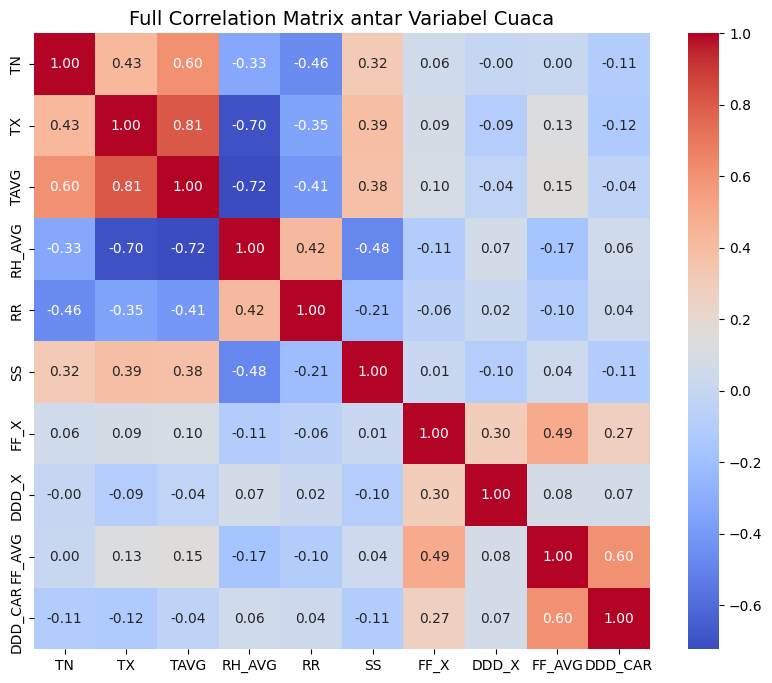

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom tanggal tidak ikut
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Buat matrix korelasi penuh
corr_matrix = numeric_df.corr()

# Visualisasikan dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Full Correlation Matrix antar Variabel Cuaca', fontsize=14)
plt.show()

# Data Modelling

In [207]:
data = df[['RR']]

In [208]:
data.head()

,RR
0,14.5
1,31.5
2,0.5
3,2.4
4,35.3


In [85]:
pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 6.3 MB/s eta 0:00:02
   ------------ --------------------------- 2.9/9.6 MB 7.9 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.6 MB 8.1 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.6 MB 8.3 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 8.0 MB/s  0:00:01

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   --------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [209]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [210]:
# buat fitur waktu tambahan
df['year'] = df['TANGGAL'].dt.year
df['month'] = df['TANGGAL'].dt.month
df['day'] = df['TANGGAL'].dt.day

# pisahkan fitur dan target
X = df[['year', 'month', 'day', 'TN', 'TX', 'TAVG', 'RH_AVG', 'SS', 'FF_X', 'DDD_X', 'FF_AVG', 'DDD_CAR']]
y = df['RR']


In [212]:
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [213]:
rf = RandomForestRegressor(
    n_estimators=200, 
    max_depth=10, 
    random_state=42
)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [214]:
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 170.7595480385914
R² Score: 0.21729545384782223


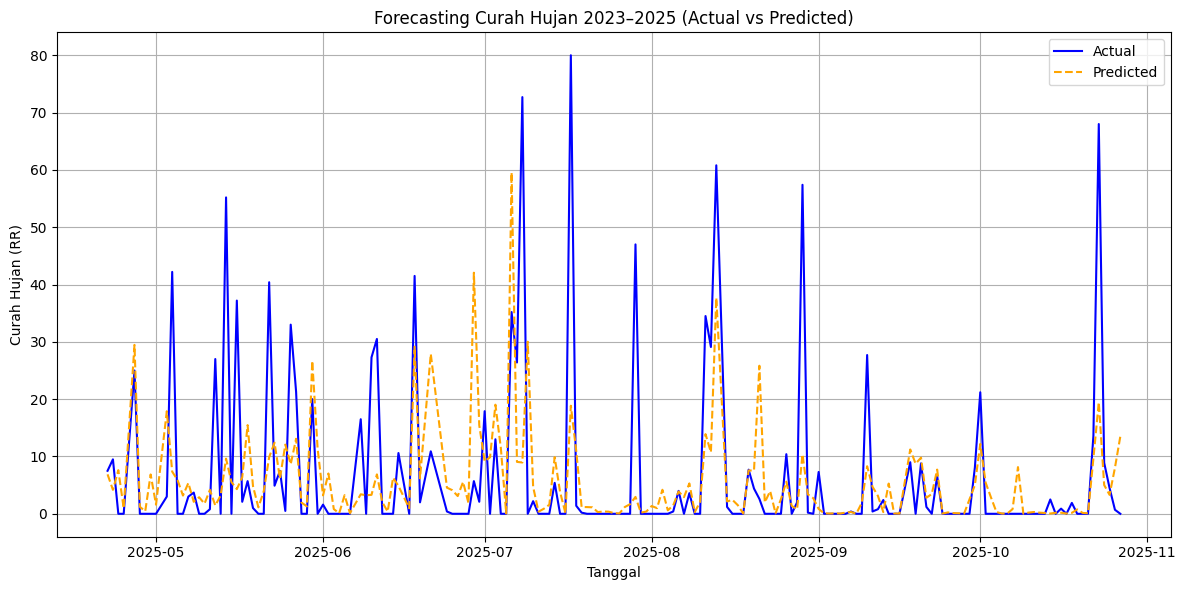

In [218]:
plt.figure(figsize=(12, 6))
plt.plot(result_df['TANGGAL'], result_df['Actual'], label='Actual', color='blue')
plt.plot(result_df['TANGGAL'], result_df['Predicted'], label='Predicted', color='orange', linestyle='--')
plt.title("Forecasting Curah Hujan 2023–2025 (Actual vs Predicted)")
plt.xlabel("Tanggal")
plt.ylabel("Curah Hujan (RR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


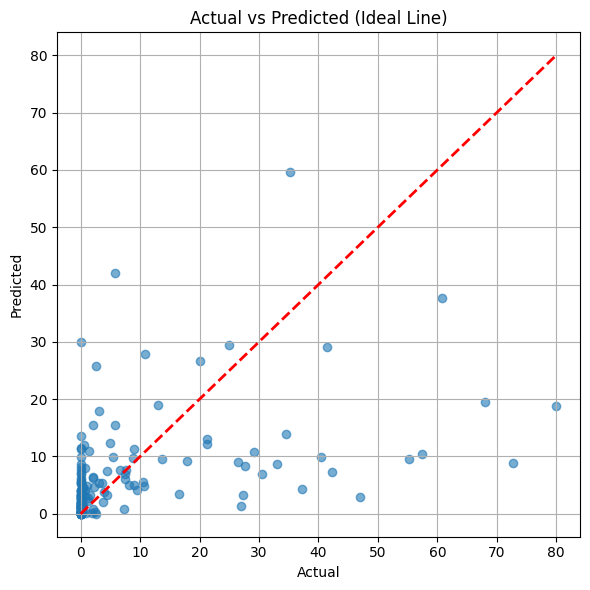

In [219]:
plt.figure(figsize=(6, 6))
plt.scatter(result_df['Actual'], result_df['Predicted'], alpha=0.6)
plt.plot([result_df['Actual'].min(), result_df['Actual'].max()],
         [result_df['Actual'].min(), result_df['Actual'].max()],
         'r--', lw=2)
plt.title("Actual vs Predicted (Ideal Line)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


In [220]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Mean Absolute Error (MAE): 6.663
Mean Squared Error (MSE): 170.760
Root Mean Squared Error (RMSE): 13.067
R² Score: 0.217


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [22]:
# XGboost

for lag in range(1, 4):
    df[f'RR_lag_{lag}'] = df['RR'].shift(lag)

# Hapus baris yang ada NaN akibat shift
df = df.dropna().reset_index(drop=True)

In [23]:
# Pilih fitur (kamu bisa tambah TAVG, RH_AVG, FF_AVG, dll)
feature_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'SS', 'FF_X', 
                'DDD_X', 'FF_AVG', 'RR_lag_1', 'RR_lag_2', 'RR_lag_3']
target_col = 'RR'

X = df[feature_cols]
y = df[target_col]


In [24]:
split_ratio = 0.8  # 80% train, 20% test
split_index = int(len(df) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [25]:
model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.05,
    max_depth=5,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.2,
    min_child_weight=3,
    random_state=42
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [28]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)   # always available
rmse = np.sqrt(mse)                        # compute RMSE manually
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 6.799
Mean Squared Error (MSE): 174.747
Root Mean Squared Error (RMSE): 13.219
R² Score: 0.208


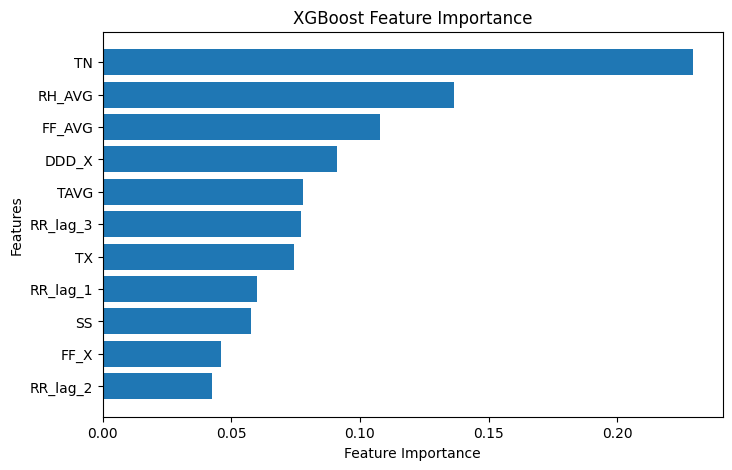

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
xgb_importance = model.feature_importances_
sorted_idx = np.argsort(xgb_importance)

plt.barh(np.array(feature_cols)[sorted_idx], xgb_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

param_grid = {
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 8],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [300, 500, 700, 900]
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=40,  # jumlah kombinasi diuji
    scoring='neg_mean_absolute_error',  # pakai MAE biar robust
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)


Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [31]:
best_params = random_search.best_params_
final_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **best_params
)
final_model.fit(X_train, y_train)

# Evaluasi ulang
y_pred_final = final_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)

print("Final tuned model:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Final tuned model:
MAE: 6.756
RMSE: 13.054
R² Score: 0.227


In [33]:
# ==============================================
# 1️⃣ Import Library
# ==============================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# ==============================================
# 2️⃣ Siapkan Data
# ==============================================
# Misalnya dataframe kamu bernama df
# Pastikan 'RR' adalah target (curah hujan hari ini)
# dan kamu ingin memprediksi curah hujan esok berdasarkan 3 hari ke belakang

# Buat fitur lag (RR-1, RR-2, RR-3)
df['RR_1'] = df['RR'].shift(1)
df['RR_2'] = df['RR'].shift(2)
df['RR_3'] = df['RR'].shift(3)

# Hapus baris NaN akibat pergeseran
df = df.dropna()

# Tentukan fitur dan target
X = df[['TN', 'TX', 'TAVG', 'RH_AVG', 'SS', 'FF_X', 'DDD_X', 'FF_AVG', 'RR_1', 'RR_2', 'RR_3']]
y = df['RR']  # Target curah hujan hari ini

# ==============================================
# 3️⃣ Split Data Train & Test
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time series → tidak diacak
)

# ==============================================
# 4️⃣ Inisialisasi Model Awal
# ==============================================
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

# ==============================================
# 5️⃣ Tuning Hyperparameter dengan GridSearchCV
# ==============================================
param_grid = {
    'n_estimators': [200, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# ==============================================
# 6️⃣ Model Terbaik dari Tuning
# ==============================================
best_model = grid_search.best_estimator_

# ==============================================
# 7️⃣ Evaluasi Model
# ==============================================
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Evaluation Result ===")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# ==============================================
# 8️⃣ Contoh Prediksi Hari Esok
# ==============================================
# Jika kamu ingin memprediksi curah hujan besok berdasarkan 3 hari terakhir:
latest_data = X.iloc[-1:].copy()  # ambil baris terakhir dari data
predicted_rain = best_model.predict(latest_data)[0]
print(f"\nPrediksi Curah Hujan Esok Hari: {predicted_rain:.2f} mm")


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.7}

=== Evaluation Result ===
Mean Absolute Error (MAE): 6.915
Mean Squared Error (MSE): 178.146
Root Mean Squared Error (RMSE): 13.347
R² Score: 0.192

Prediksi Curah Hujan Esok Hari: 5.59 mm
